In [2]:
!pip install summa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for summa: filename=summa-1.2.0-py3-none-any.whl size=54388 sha256=d84634e505283fcd2a44945a8a5206558504ed2a4d8dda5c95a02c17e1d40269
  Stored in directory: /root/.cache/pip/wheels/4a/ca/c5/4958614cfba88ed6ceb7cb5a849f9f89f9ac49971616bc919f
Successfully built summa


In [3]:
!pip install lexrank

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.8/69.8 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 5.1 MB/s eta 0:00:00


In [4]:
import pandas as pd
from summa import summarizer
import seaborn as sns
from tqdm import tqdm
import re

In [5]:
from lexrank import LexRank
from lexrank.mappings.stopwords import STOPWORDS
from path import Path

In [6]:
sns.set_style("whitegrid")

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Read Data

In [ ]:
PATH = '/content/drive/MyDrive/ITMO/T5QA'

#data = pd.read_csv(PATH + '/data/MedQuAD_answers_sum.csv', sep='\t', header=None)
data = pd.read_csv(PATH + '/data/MedQuAD_answers_sum_128.csv', sep='\t', header=None)
data.index = [i for i in range(len(data))]
data.columns = ["question", "context", "answer"]


data

<Axes: ylabel='Count'>

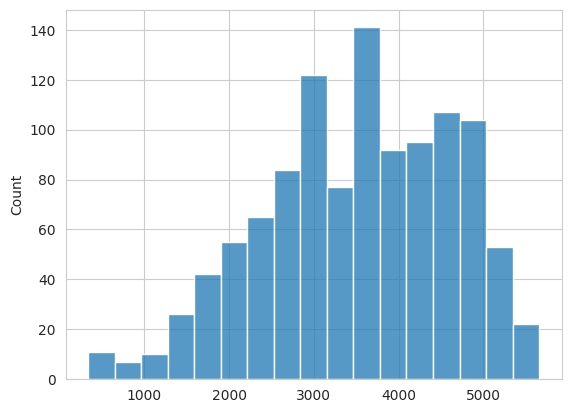

In [14]:
# Distribution of context lengths
context_len_lst = [len(context) for context in data.context]

sns.histplot(data=context_len_lst)

## Summarize the Context

In [11]:
example = data.iloc[0].context
example

' кератодермия с пушистыми волосами представляет собой группу связанных состояний, которые поражают кожу и волосы и во многих случаях повышают риск потенциально опасных для жизни проблем с сердцем. у людей с такими заболеваниями волосы необычно грубые, сухие, тонкие и туго завитые. в некоторых случаях волосы также редкие. шерстистая текстура волос обычно поражает только волосы на коже головы и присутствует с рождения. начиная с раннего возраста, у пораженных людей также развивается ладонноподошвенная кератодермия состояние, при котором кожа на ладонях рук и подошвах ног становится толстой, чешуйчатой \u200b\u200bи мозолистой. кардиомиопатия, заболевание сердечной мышцы, является опасная для жизни проблема со здоровьем, которая может развиться у людей с кератодермией и пушистыми волосами. в отличие от других особенностей этого состояния, признаки и симптомы кардиомиопатии могут не проявляться до подросткового возраста или позже. осложнения кардиомиопатии могут включать нарушение сердечн

In [21]:
example_sum = summarizer.summarize(example)
example_sum = re.sub('[\n\t]', ' ', example_sum)
example_sum

'кератодермия с пушистыми волосами представляет собой группу связанных состояний, которые поражают кожу и волосы и во многих случаях повышают риск потенциально опасных для жизни проблем с сердцем. кардиомиопатия, заболевание сердечной мышцы, является опасная для жизни проблема со здоровьем, которая может развиться у людей с кератодермией и пушистыми волосами. кератодермия с пушистыми волосами включает в себя несколько связанных состояний с перекрывающимися признаками и симптомами. тип i, также известный как болезнь наксоса, характеризуется ладонноподошвенной кератодермией, пушистыми волосами и формой кардиомиопатии, называемой аритмогенной кардиомиопатией правого желудочка адпж. причины мутации в генах jup, dsp, dsc2 и kank2 вызывают кератодермию с шерстистыми типами волос от i до iv соответственно. этот механизм, вероятно, лежит в основе проблем с кожей, волосами и сердцем, возникающих при кератодермии с пушистыми волосами. в отличие от других генов, связанных с кератодермией с пушист

In [22]:
for ind in tqdm(range(len(data))):
    text = data.iloc[ind].context
    text_sum = summarizer.summarize(text)

    text_sum = re.sub('[\n\t]', ' ', text_sum)

    with open(PATH + '/data/MedQuAD_context_answers_sum.csv', "a") as w:
        w.write(f"{data.iloc[ind].question}\t{text_sum}\t{data.iloc[ind].answer}\n")

100%|██████████| 1113/1113 [00:51<00:00, 21.67it/s]


In [24]:
example = data.iloc[289].context
example

'следующие организации являются хорошими источниками информации о жестоком обращении с детьми, инцесте, домашнем насилии и семейных проблемах: управление по делам детей и семей www.acf.hhs.gov центры по контролю и профилактике заболеваний www.cdc.gov/violenceprevention/communicationresources /infographics/can.htmlchildhelp www.childhelp.orgинформация службы благосостояния детей www.childwelfare.govнациональная сеть по борьбе с травматическим стрессом у детей www.nctsn.org/aboutus/contactus/gethelpnowнациональная сеть по борьбе с насилием в семье горячая линия www.thehotline.orgнациональная линия помощи лицам, сбежавшим из дома www.1800runaway.orgprevent childabuse america preventchildabuse.orgrainn национальная сеть по изнасилованию, жестокому обращению и инцесту www.rainn.org'

In [26]:
example_sum = summarizer.summarize(example, ratio=0.1)
example_sum = re.sub('[\n\t]', ' ', example_sum)
example_sum

''

In [27]:
example = "вы не можете устранить все угрозы безопасности из своей жизни, но можете их уменьшить. чтобы избежать многих серьезных опасностей и подготовиться к чрезвычайным ситуациям: держите номера экстренных служб рядом с телефонами. сделайте аптечку для дома. составьте семейный план действий в чрезвычайной ситуации. установите и обслуживайте датчики дыма и детекторы угарного газа. держите оружие разряженным и запертым. боеприпасы запирайте отдельно. тщательно следуйте инструкциям при использовании инструментов или оборудования. особенно подвержены риску маленькие дети. надзор лучший способ обеспечить их безопасность. защита дома от детей также может помочь. узнайте больше американский красный крест также на испанском языке безопасность детей: тема medlineplus health национальная медицинская библиотека также на испанском языке оружие в доме: как обеспечить безопасность детей американская академия педиатрии также на испанском языке контрольный список домашней электробезопасности безопасность потребительских товаров комиссия pdf бытовая безопасность: системы электроснабжения, отопления и охлаждения фонд немура безопасность для пожилых потребителей: контрольный список домашней безопасности комиссия по безопасности потребительских товаров pdf как оставаться в безопасности дома медицинская энциклопедия также в статьях испанских журналов"
example_sum = summarizer.summarize(example, ratio=0.1)
example_sum = re.sub('[\n\t]', ' ', example_sum)
example_sum


'узнайте больше американский красный крест также на испанском языке безопасность детей: тема medlineplus health национальная медицинская библиотека также на испанском языке оружие в доме: как обеспечить безопасность детей американская академия педиатрии также на испанском языке контрольный список домашней электробезопасности безопасность потребительских товаров комиссия pdf бытовая безопасность: системы электроснабжения, отопления и охлаждения фонд немура безопасность для пожилых потребителей: контрольный список домашней безопасности комиссия по безопасности потребительских товаров pdf как оставаться в безопасности дома медицинская энциклопедия также в статьях испанских журналов'